<a href="https://colab.research.google.com/github/Girisha-Malni-builds01/Girisha-AI-Practice-Notebook/blob/Supervised-AI-Algorithms/Linear_Regression_%2B_Gradient_Descent_%2B_Scaling_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1) * 50   # Feature: house size
y = 5 + 3 * X + np.random.randn(100, 1) * 20  # Price with noise

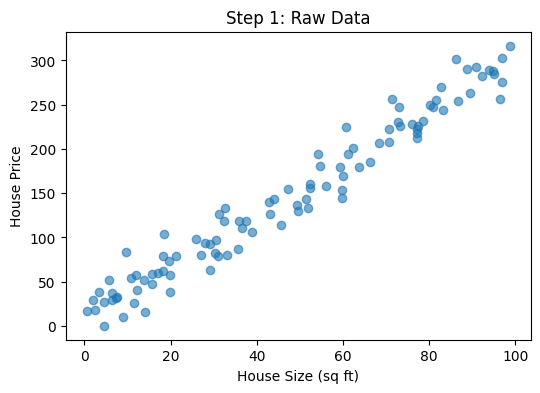

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.6)
plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price")
plt.title("Step 1: Raw Data")
plt.show()

In [11]:
def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

def gradient_descent(X, y, theta, lr, iters):
    m = len(y)
    cost_history = []
    for i in range(iters):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

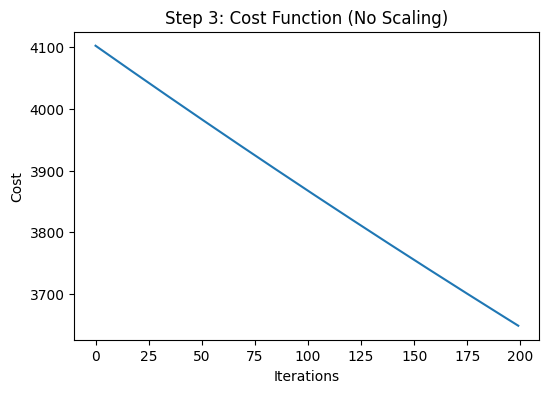

In [12]:
X_b = np.c_[np.ones((100, 1)), X]
theta = np.random.randn(2,1)
theta_final, cost_hist_raw = gradient_descent(X_b, y, theta, lr=0.0000001, iters=200)

plt.figure(figsize=(6,4))
plt.plot(cost_hist_raw)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Step 3: Cost Function (No Scaling)")
plt.show()

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_b = np.c_[np.ones((100, 1)), X_scaled]
theta = np.random.randn(2,1)
theta_final_scaled, cost_hist_scaled = gradient_descent(X_scaled_b, y, theta, lr=0.1, iters=200)

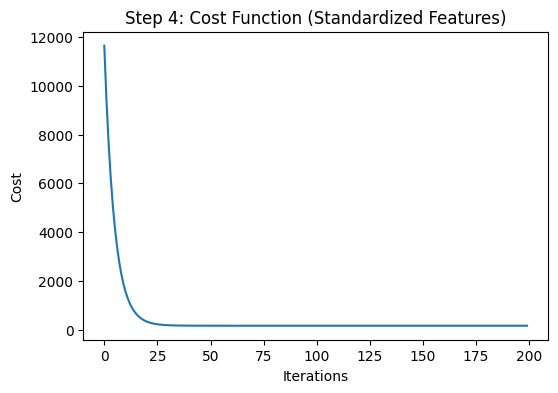

In [14]:
plt.figure(figsize=(6,4))
plt.plot(cost_hist_scaled)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Step 4: Cost Function (Standardized Features)")
plt.show()


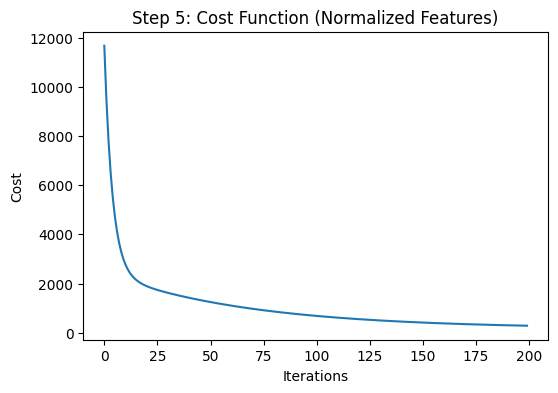

In [15]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm_b = np.c_[np.ones((100, 1)), X_norm]
theta = np.random.randn(2,1)
theta_final_norm, cost_hist_norm = gradient_descent(X_norm_b, y, theta, lr=0.1, iters=200)

plt.figure(figsize=(6,4))
plt.plot(cost_hist_norm)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Step 5: Cost Function (Normalized Features)")
plt.show()

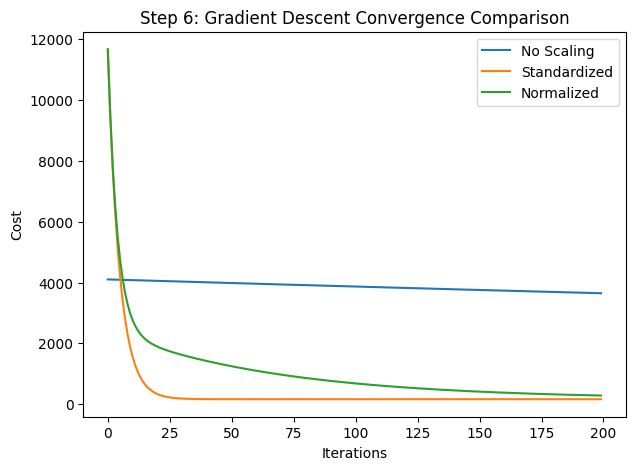

In [16]:
plt.figure(figsize=(7,5))
plt.plot(cost_hist_raw, label="No Scaling")
plt.plot(cost_hist_scaled, label="Standardized")
plt.plot(cost_hist_norm, label="Normalized")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Step 6: Gradient Descent Convergence Comparison")
plt.legend()
plt.show()

**Step 7: Final prediction visualization (normalized case for clarity)**

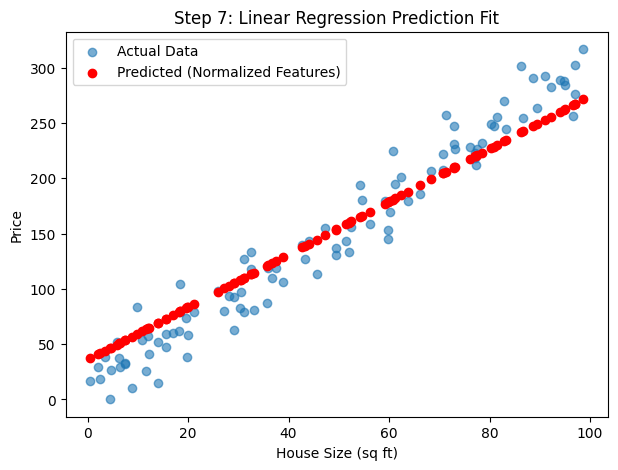

In [17]:
y_pred = X_norm_b.dot(theta_final_norm)
plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.6, label="Actual Data")
plt.scatter(X, y_pred, color="red", label="Predicted (Normalized Features)")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price")
plt.title("Step 7: Linear Regression Prediction Fit")
plt.legend()
plt.show()